<a href="https://colab.research.google.com/github/sarwansaleh/LUMS/blob/main/bank_lums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment: Pick a Business Problem and Solve using Machine Learning**

Team: **Informatics**

Members: Ms. Rida Naeem, Ms. Aysha, Mr. SM Ali Rizvi, Mr. Sarwan, Mr. Jawad Ahmed

Course Title: Data Science & Machine Learning using Python

Instructor: Mr. Shazeb Ali

## <center> **Picking & Analyzing Business Problem**

**Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? Analyze the last marketing campaign the bank performed and identify the patterns that will help find conclusions in order to develop future strategies.**

## <center> **Getting Data**

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Location of data in Google Drive
bank = '/content/drive/MyDrive/bank.csv'

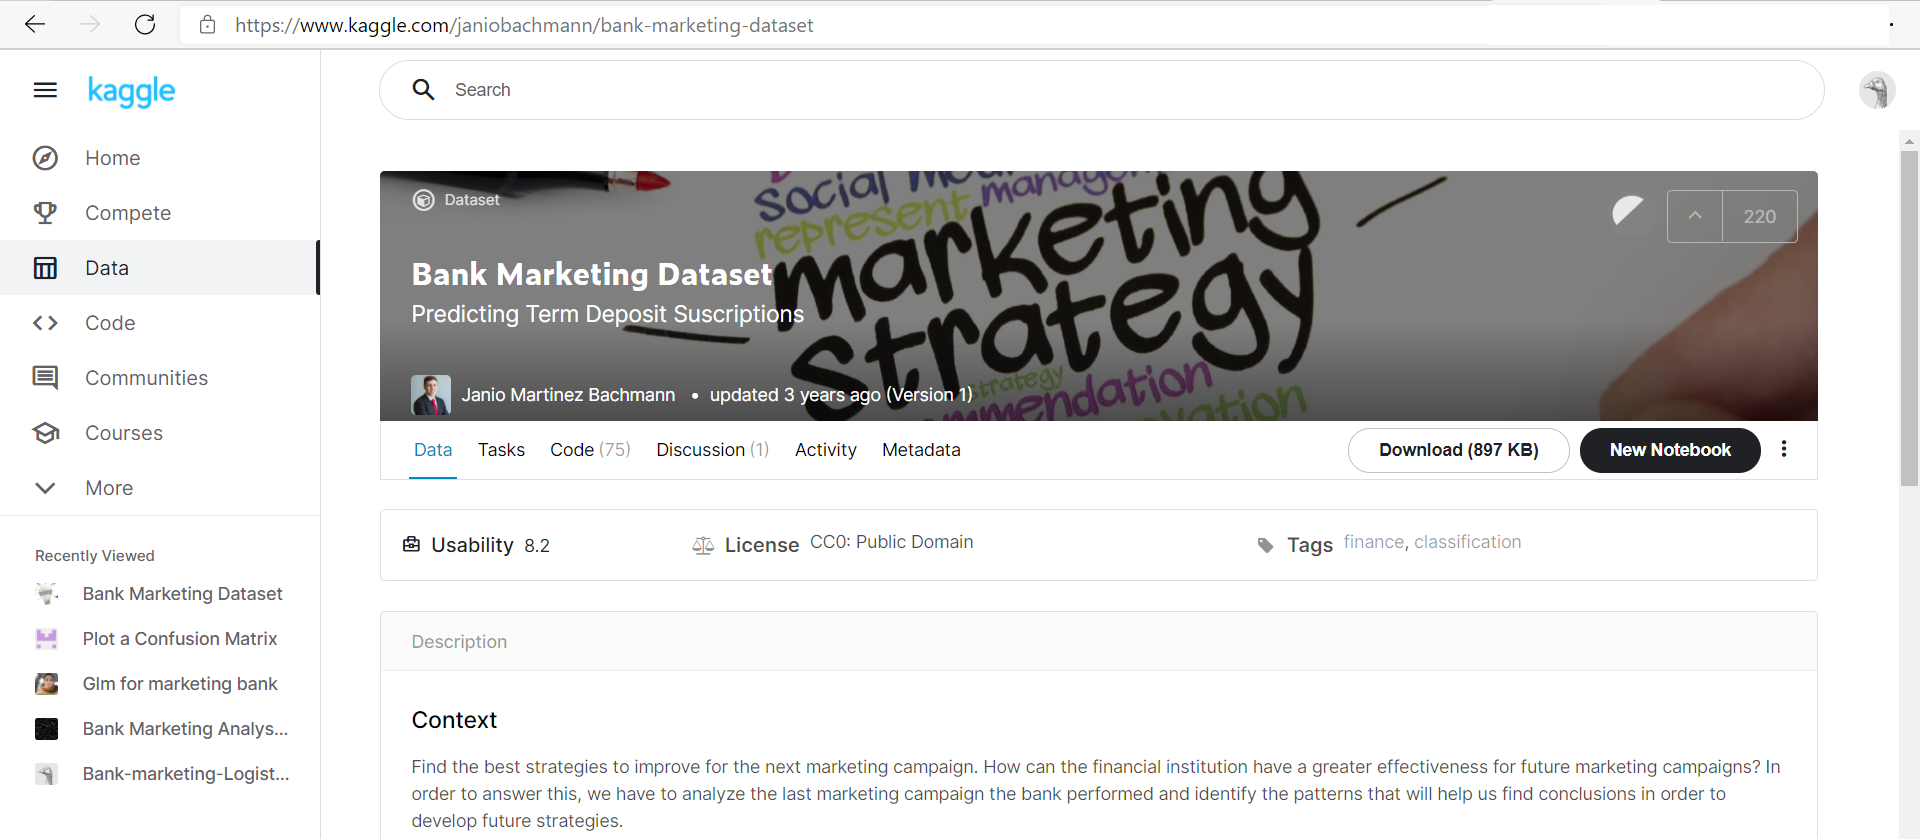

## <center> **Importing Libraries**

In [ ]:
# Common imports
import pandas as pd
import numpy as np

# To plot data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assigning our data as a Pandas data frame
data = pd.read_csv(bank)

## <center> **Data Analysis**

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


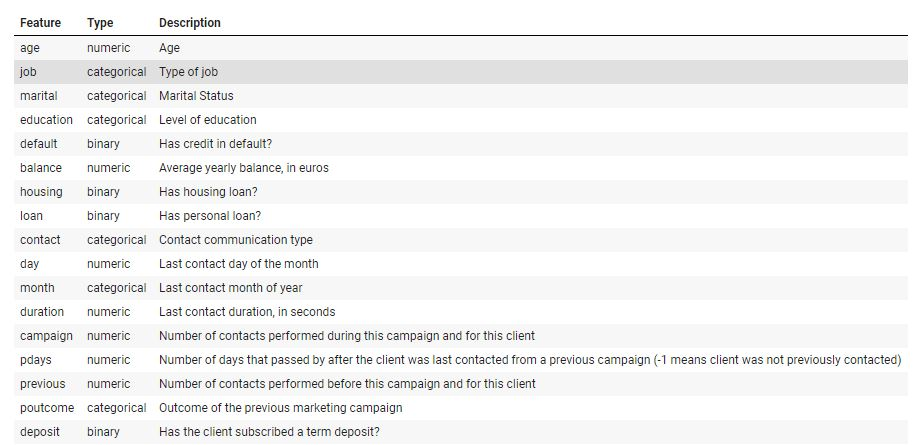

In [ ]:
# Summary of statistics for numeric columns only
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# Summary of statistics for all the columns
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.shape

(11162, 17)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Observation: From the above data analysis, we can see that there are no null values in our data.**

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

**In our data, in addition to Numerical columns, we have Categorical columns as well. In the following loop, we will separate both.**

In [ ]:
cat_cols = []
num_cols = []
cols = data.columns
for col in cols:
  if data[col].dtype == 'object':
    cat_cols.append(col)
  else:
    num_cols.append(col)
print(cat_cols)
print(num_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


**Correlations**

In [ ]:
correlations = data.corr()
correlations 

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


## <center> **Data Visualization**

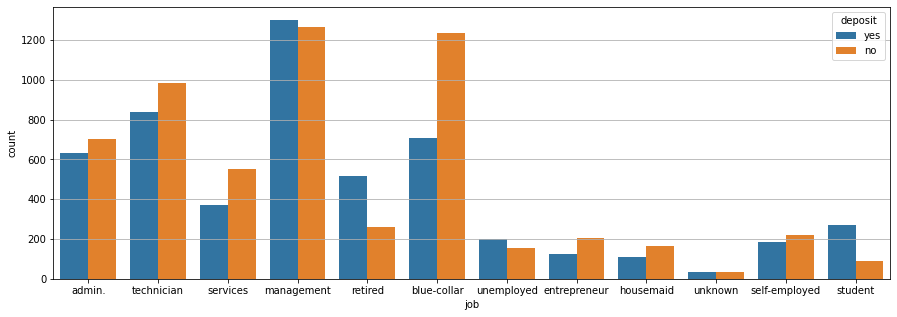

In [ ]:
plt.figure(figsize=(15,5),facecolor='white', frameon=True)
plt.grid()
sns.countplot(x='job', hue ='deposit', data=data)


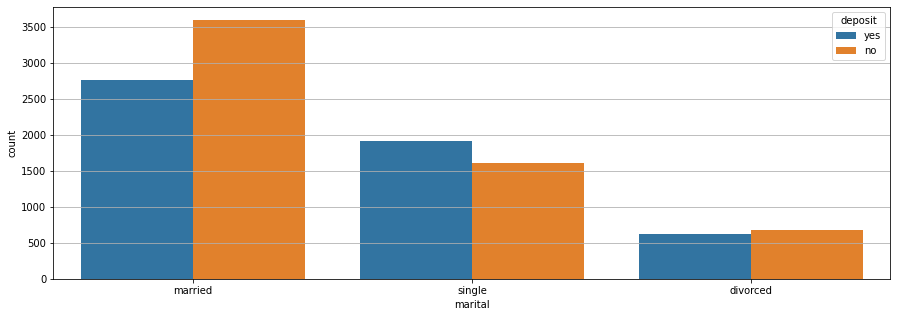

In [ ]:
plt.figure(figsize=(15,5),facecolor='white', frameon=True)
plt.grid()
sns.countplot(x='marital', hue ='deposit', data=data)


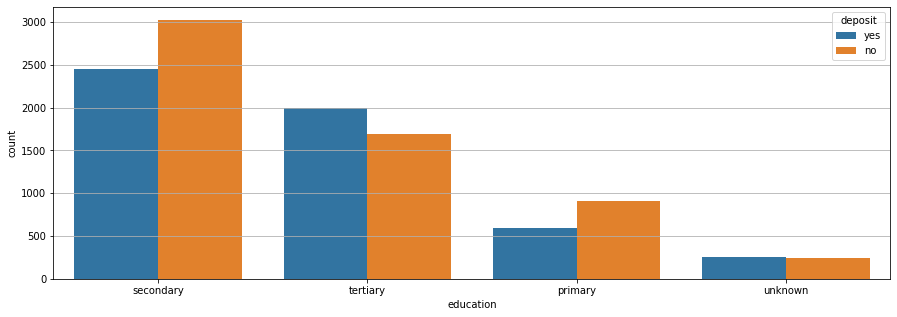

In [ ]:
plt.figure(figsize=(15,5),facecolor='white', frameon=True)
plt.grid()
sns.countplot(x='education', hue ='deposit', data=data)




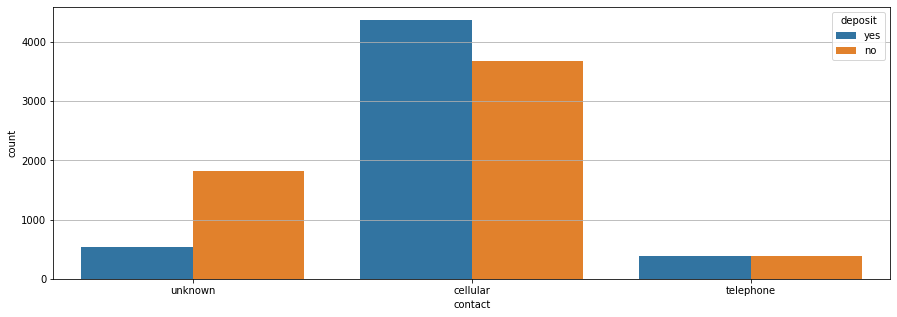

In [ ]:
plt.figure(figsize=(15,5),facecolor='white', frameon=True)
plt.grid()
sns.countplot(x='contact', hue ='deposit', data=data)


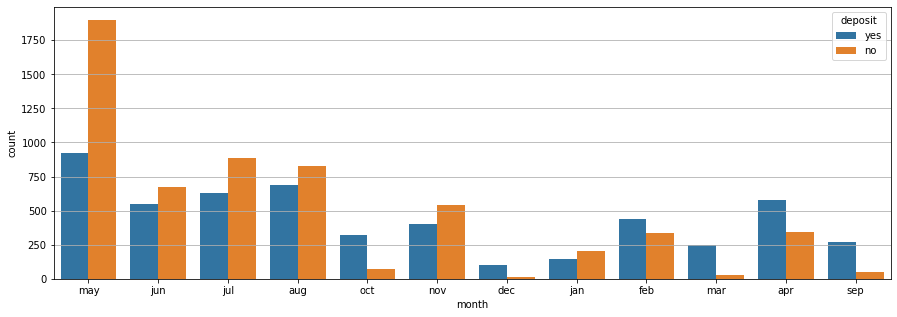

In [ ]:
plt.figure(figsize=(15,5),facecolor='white', frameon=True)
plt.grid()
sns.countplot(x='month', hue ='deposit', data=data)


In [ ]:
correlations

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [ ]:
for columns in num_cols:
  for col in cat_cols:
    category = data[col].unique()
    #print(category,col)
    for element in category:
      #print(columns,element, category,col)
 #   if (bank[col]==str_column[n] & )
  #  print(bank[col])
   # n=n+1
      try:
        cor=(data[col]==element).corr(data[columns])
         #print(columns,col,category,element)
        #print(columns,' ', element, ' ', cor)
        if (cor> 0.4 or cor<-0.4):
          print(columns,' ', element, ' ', cor)        
      except:
        print(" ------ ")



age   retired   0.5558632722874657
age   single   -0.46779900252470585
duration   yes   0.45191936084258283
duration   no   -0.4519193608425829
pdays   unknown   -0.8239277930757218
pdays   failure   0.6026154262729001
previous   unknown   -0.6221491134997315


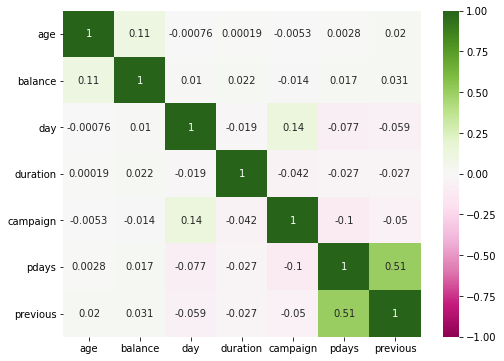

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), vmax=1, vmin=-1, annot=True, fmt='.2g', cbar=True, cmap="PiYG")

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
dictionary = {0:'admin.', 9:'technician', 7:'services', 4:'management', 5:'retired', 1:'blue-collar', 10:'unemployed', 2:'entrepreneur', 3:'housemaid', 11:'unknown', 6:'self-employed', 8:'student'}

**Doing Encoding to convert the Categorical columns to Numerical columns in the data.**

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 

for columns in cat_cols: 
  data[columns]=label_encoder.fit_transform(data[columns])

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


**Correlance**

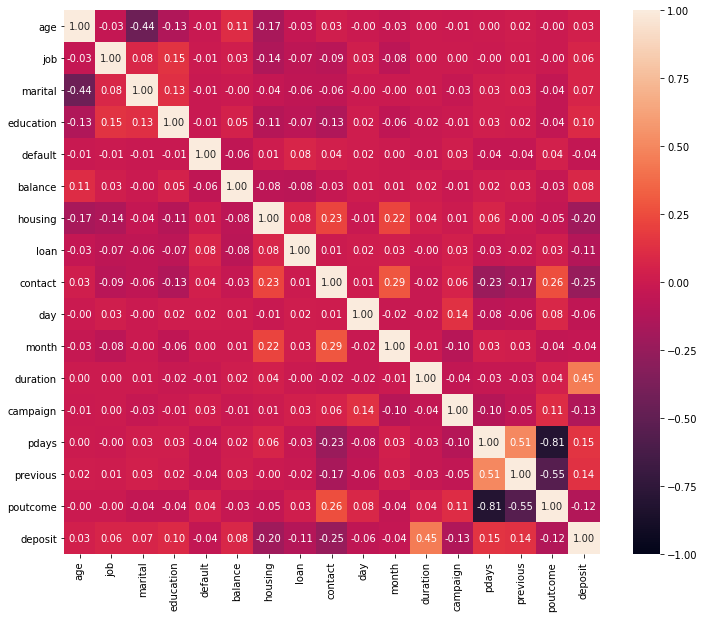

In [ ]:
correlance = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlance, annot=True, fmt='.2f', vmin=-1, vmax=1)

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


# <center> **Data Preparation for ML**

**Assigning Features (X) and Target (y) of the data.**

In [ ]:
X = data.drop(['deposit'], axis=1) # (axis1 refers to column!!)
y = data['deposit']

**Splitting the data into train and test sets.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 0, test_size = 0.2 )

**Importing Models and scalers.**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# <center> **Training & Comparing ML Models**

**Logistic Regression**

The Test Score for Logistic Regression is 0.7568293775190327
[[954 251]
 [292 736]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


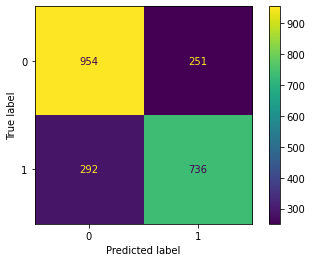

In [ ]:
# Initializing the model
lr = LogisticRegression()

# Fitting the model on training sets
lr.fit(X_train, y_train)

# Scoring the model on testing sets
print('The Test Score for Logistic Regression is {}'.format(lr.score(X_test, y_test)))

# Creating the Confusion Matrix (to help analysing the error rate)...
y_pred = lr.predict(X_test)
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)
metrics.plot_confusion_matrix(lr, X_test, y_test, values_format='d')



**Decision Tree**

The Test Score for Decsion Tree Classifier is 0.7702642185400806
[[953 252]
 [261 767]]


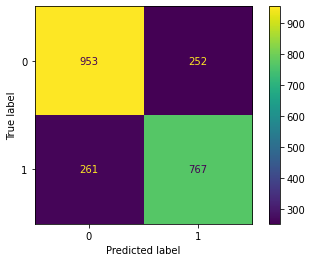

In [ ]:
# Initializing the model
dt = tree.DecisionTreeClassifier()

# Fitting the model on training sets
dt.fit(X_train, y_train)

# Scoring the model on testing sets
print('The Test Score for Decsion Tree Classifier is {}'.format(dt.score(X_test, y_test)))

# Creating the Confusion Matrix (to help analysing the error rate)...
y_pred = dt.predict(X_test)
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)
metrics.plot_confusion_matrix(dt, X_test, y_test, values_format='d')


**Random Forest**

The Test Score for Random Forest Classifier is 0.8410210479175997
[[998 207]
 [148 880]]


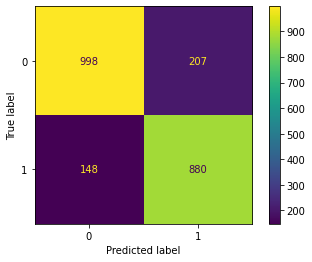

In [ ]:
# Initializing the model:
rf = RandomForestClassifier(100)

# Fitting the model on training sets
rf.fit(X_train, y_train)

# Scoring the model on testing sets
print('The Test Score for Random Forest Classifier is {}'.format(rf.score(X_test, y_test)))

# Creating the Confusion Matrix (to help analysing the error rate)...
y_pred = rf.predict(X_test)
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)
metrics.plot_confusion_matrix(rf, X_test, y_test, values_format='d')


**KNN**

The Test Score for KNN Classifier is 0.7787729511867443
[[916 289]
 [294 734]]


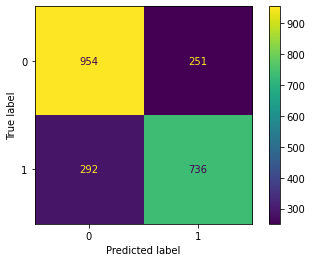

In [ ]:
# Initializing the model:
kn = KNeighborsClassifier()

# Fitting the model on training sets
kn.fit(X_train, y_train)

# Scoring the model on testing sets
print('The Test Score for KNN Classifier is {}'.format(dt.score(X_test, y_test)))

# Creating the Confusion Matrix (to help analysing the error rate)...
y_pred = kn.predict(X_test)
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)
metrics.plot_confusion_matrix(lr, X_test, y_test,values_format='d')


# <center> **Model Selection**

**We have chosen Random Forest Classifier.**

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
#Adding a Dictionary for our dataset for easier interpretation of the features

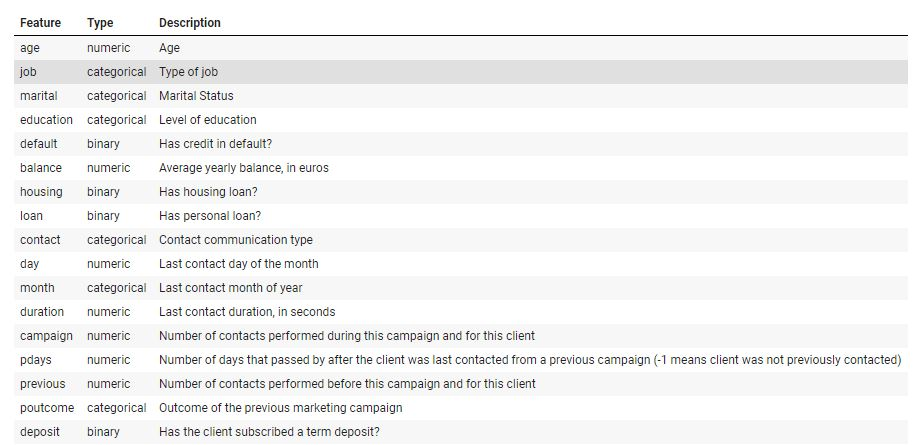

**Filtering and Selecting Optimum Features of the Data**

In [ ]:
# Initializing the model:
rf = RandomForestClassifier(100)

# Fitting the model on training sets
rf.fit(X_train[['age', 'job', 'balance', 'contact', 'day', 'month', 'duration', 'poutcome']], y_train)

# Scoring the model on testing sets
print('The Test Score for Random Forest Classifier is {}'.format(rf.score(X_test[['age', 'job', 'balance', 'contact', 'day', 'month', 'duration', 'poutcome']], y_test)))

# # Creating the Confusion Matrix (to help analysing the error rate)...
# y_pred = rf.predict(X_test)
# confusion_m = confusion_matrix(y_test, y_pred)
# print(confusion_m)
# metrics.plot_confusion_matrix(lr, X_test, y_test, values_format='d')


The Test Score for Random Forest Classifier is 0.8280340349305867


**Visually analyzing selected optimum features of the data**

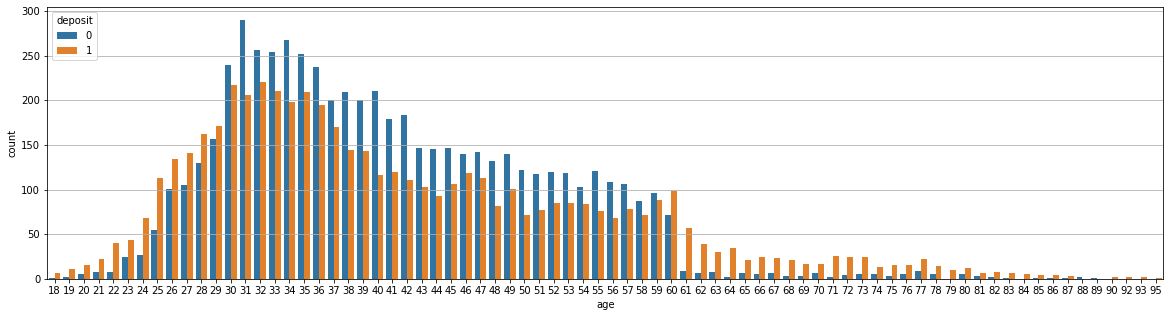

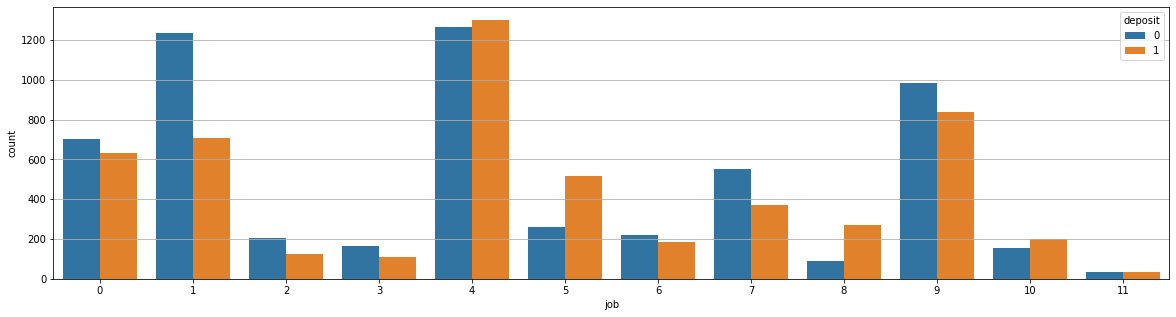

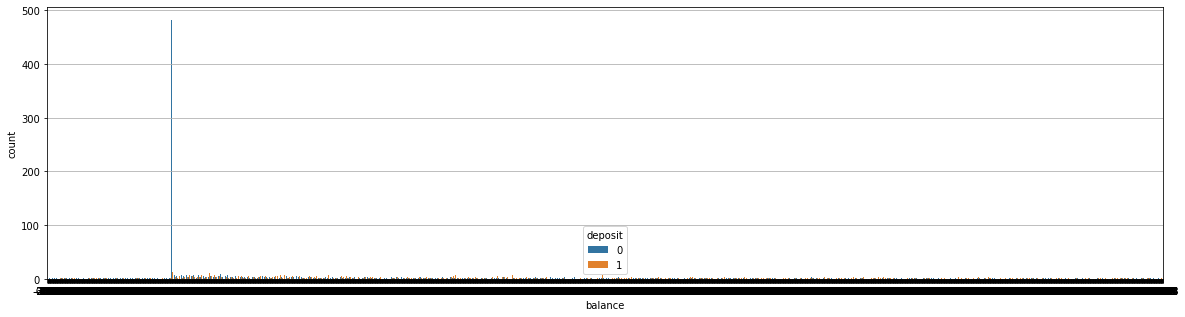

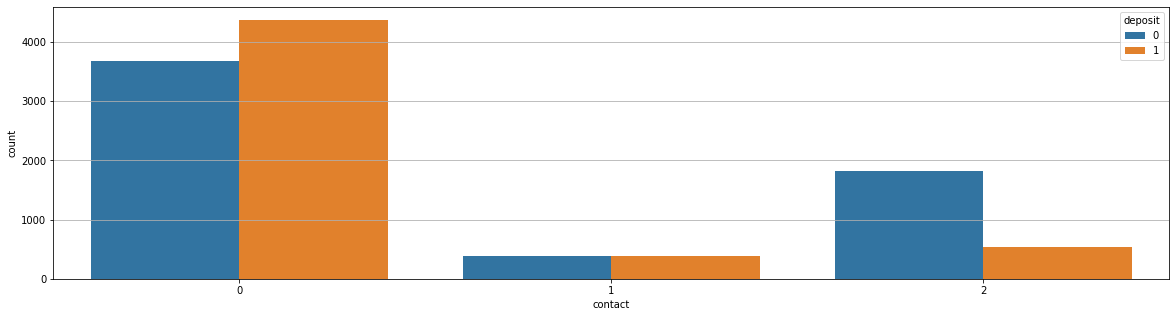

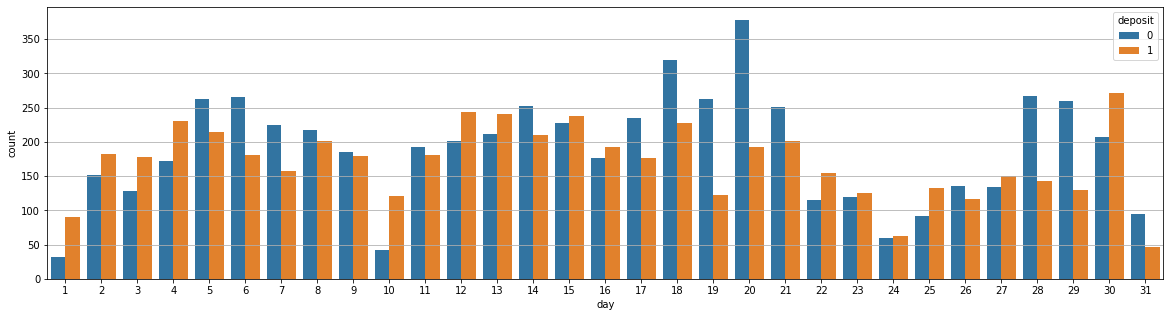

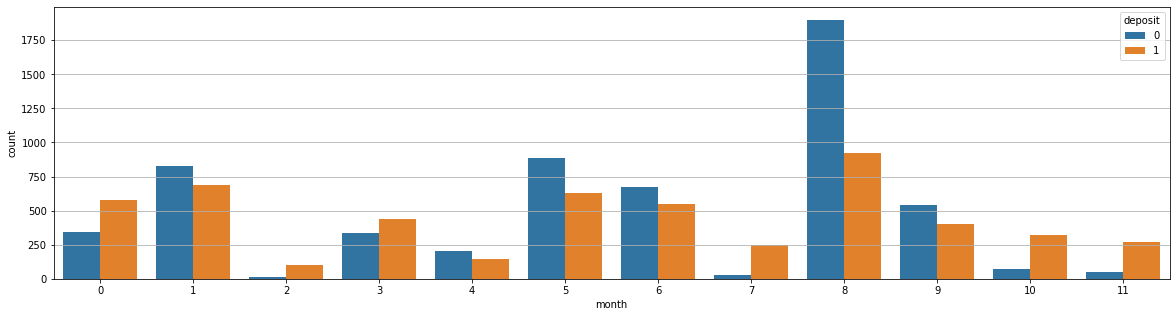

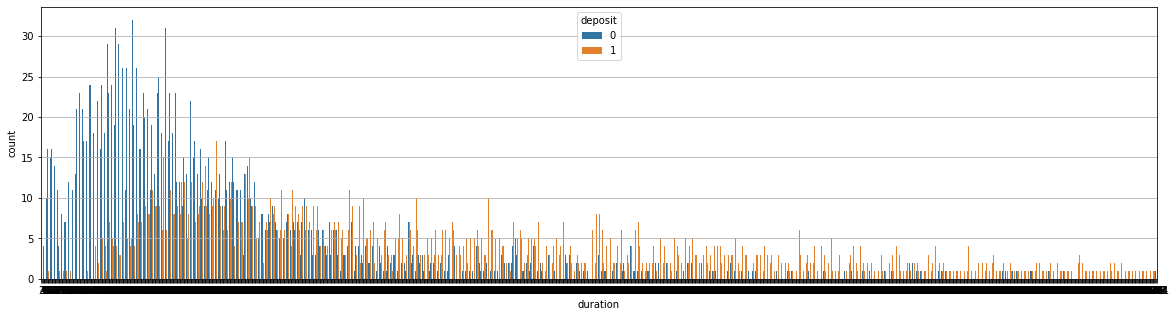

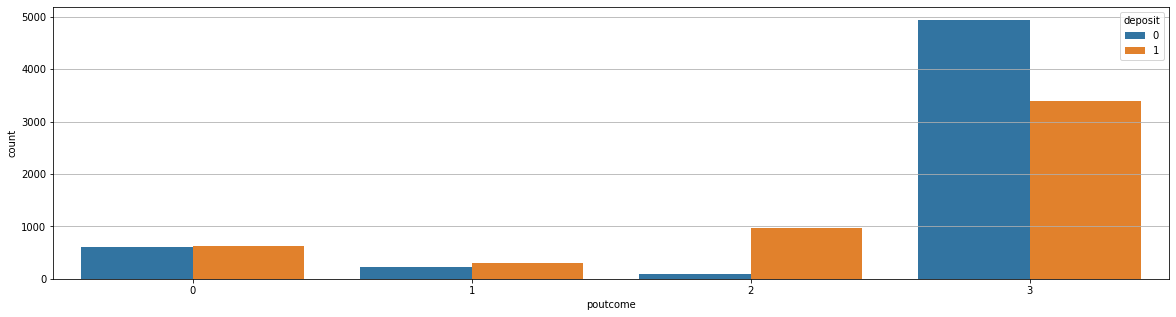

In [ ]:
major_factors = ['age', 'job', 'balance', 'contact', 'day', 'month', 'duration', 'poutcome']
for ali in major_factors:
  plt.figure(figsize=(20,5),facecolor='white', frameon=True)
  plt.grid()
  sns.countplot(x=ali, hue ='deposit', data=data)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


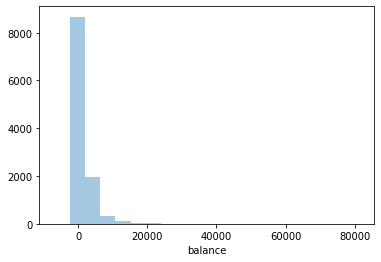

In [ ]:
sns.distplot(data['balance'], kde=False, bins=20)

In [ ]:
# lets see this later (balance vs deposit, any visualizatuin)

In [ ]:
dictionary

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed',
 11: 'unknown'}

# <center> **Conclusion**

# **According to the analysis, the best strategies to improve the next marketing campaign are as follows:**

1. The next campaign should focus on people belonging to age bracket of 27-37 years old.

---
2. The next campaign should focus on people with jobs in  management, technician, blue colared & administration.

---
3. The next campaign should focus on cellular advertisments.

---
4. The next campaign should focus on months of June, July and September.